In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from datetime import datetime

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix 
import sklearn.metrics as metrics
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D

import xgboost as xgb

from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten, Dropout, BatchNormalization, Conv2D, BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from imblearn.over_sampling import SMOTE 

2024-07-11 16:36:20.260751: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-11 16:36:20.260894: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-11 16:36:20.450383: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Loading two datasets:

# df - only 34 genes + diagnosis for model training
df = pd.read_csv('/kaggle/input/only-genes/genes.csv')

# df_analysing - 34 genes + 71 features of each patient + 6 features from the second part of the patient ID for analysis
df_analysing = pd.read_csv('/kaggle/input/patients-with-genes/patients_with_genes.csv')

df.head()

,Unnamed: 0,ENSG00000007968.7,ENSG00000080839.12,ENSG00000096968.14,ENSG00000101412.13,ENSG00000103479.16,ENSG00000105173.14,ENSG00000105810.10,ENSG00000110092.4,ENSG00000111276.11,...,ENSG00000162434.13,ENSG00000164045.12,ENSG00000165891.16,ENSG00000168610.16,ENSG00000169016.17,ENSG00000170312.16,ENSG00000170581.14,ENSG00000173757.10,ENSG00000197122.12,ENSG00000205250.9
0,TCGA-38-7271-01A-11R-2039-07,103,355,940,221,2135,67,765,6327,2885,...,9325,66,27,11759,273,394,3149,2918,1832,2089
1,TCGA-55-7914-01A-11R-2170-07,131,425,1033,563,2706,211,453,11707,2561,...,5019,107,57,14069,573,1366,6050,2515,6685,2355
2,TCGA-95-7043-01A-11R-1949-07,123,379,281,916,1247,812,152,1966,2064,...,2040,76,42,16958,555,786,2066,2356,9958,1835
3,TCGA-73-4658-01A-01R-1755-07,160,531,775,399,1723,185,903,12465,2811,...,9286,80,40,12227,404,753,3874,2302,3523,1980
4,TCGA-86-8076-01A-31R-2241-07,203,507,1382,238,4188,155,1433,8374,5175,...,11676,121,67,24638,673,578,6735,3369,3558,3001


In [3]:
df_analysing['primary_diagnosis'].value_counts()

primary_diagnosis
Adenocarcinoma, NOS                            376
Adenocarcinoma with mixed subtypes             114
Papillary adenocarcinoma, NOS                   25
Acinar cell carcinoma                           22
Bronchiolo-alveolar carcinoma, non-mucinous     22
Mucinous adenocarcinoma                         20
Solid carcinoma, NOS                             6
Bronchio-alveolar carcinoma, mucinous            5
Clear cell adenocarcinoma, NOS                   3
Micropapillary carcinoma, NOS                    3
Bronchiolo-alveolar adenocarcinoma, NOS          3
Signet ring cell carcinoma                       1
Name: count, dtype: int64

In [4]:
df.describe()

,ENSG00000007968.7,ENSG00000080839.12,ENSG00000096968.14,ENSG00000101412.13,ENSG00000103479.16,ENSG00000105173.14,ENSG00000105810.10,ENSG00000110092.4,ENSG00000111276.11,ENSG00000112242.15,...,ENSG00000162434.13,ENSG00000164045.12,ENSG00000165891.16,ENSG00000168610.16,ENSG00000169016.17,ENSG00000170312.16,ENSG00000170581.14,ENSG00000173757.10,ENSG00000197122.12,ENSG00000205250.9
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,351.023333,693.525000,1132.811667,1153.583333,3663.245000,475.985000,1759.863333,12775.388333,3372.201667,1468.675000,...,8966.773333,263.146667,222.640000,17399.411667,688.436667,1645.155000,7117.161667,3182.576667,4604.631667,3353.198333
std,400.121709,503.899514,720.742686,1327.395539,2148.037514,1106.428491,3475.327099,13183.764450,1783.180617,1048.391667,...,4444.847488,295.912485,368.624172,9314.885800,424.326153,1726.661552,4605.452260,1549.922618,3050.822996,1816.949159
min,8.000000,67.000000,113.000000,20.000000,377.000000,10.000000,59.000000,315.000000,287.000000,139.000000,...,546.000000,7.000000,2.000000,2045.000000,67.000000,84.000000,879.000000,353.000000,193.000000,230.000000
25%,109.000000,337.750000,618.000000,374.750000,2121.000000,104.750000,662.500000,5724.000000,2113.750000,721.750000,...,5807.000000,80.000000,48.750000,11005.500000,393.000000,490.000000,4060.000000,2075.250000,2340.000000,2093.500000
50%,229.500000,544.500000,970.500000,692.500000,3168.000000,215.500000,1127.500000,9098.000000,2882.500000,1200.500000,...,8157.500000,170.500000,111.500000,15241.500000,582.000000,1121.000000,6111.500000,2941.500000,4008.000000,2990.500000
75%,452.250000,903.750000,1449.250000,1542.000000,4586.500000,502.500000,2013.500000,14895.750000,4296.250000,1846.750000,...,11229.000000,334.000000,242.000000,21661.250000,839.250000,2091.250000,9027.250000,4091.250000,5832.750000,4264.750000
max,3842.000000,3473.000000,4067.000000,12896.000000,15824.000000,18627.000000,75574.000000,135371.000000,10611.000000,7006.000000,...,26899.000000,2774.000000,4736.000000,56513.000000,3232.000000,13665.000000,57269.000000,9535.000000,20277.000000,14414.000000


In [5]:
df.insert(loc=35 , column='primary_diagnosis', value=df_analysing['primary_diagnosis'])

In [6]:
# Add a diagnosis to the gene expression dataset
[column for column in df]

['Unnamed: 0',
 'ENSG00000007968.7',
 'ENSG00000080839.12',
 'ENSG00000096968.14',
 'ENSG00000101412.13',
 'ENSG00000103479.16',
 'ENSG00000105173.14',
 'ENSG00000105810.10',
 'ENSG00000110092.4',
 'ENSG00000111276.11',
 'ENSG00000112242.15',
 'ENSG00000115415.20',
 'ENSG00000118971.9',
 'ENSG00000123374.11',
 'ENSG00000124762.14',
 'ENSG00000126561.17',
 'ENSG00000129173.13',
 'ENSG00000133101.10',
 'ENSG00000133740.11',
 'ENSG00000134057.15',
 'ENSG00000135446.17',
 'ENSG00000136997.21',
 'ENSG00000139687.16',
 'ENSG00000147883.12',
 'ENSG00000147889.18',
 'ENSG00000162434.13',
 'ENSG00000164045.12',
 'ENSG00000165891.16',
 'ENSG00000168610.16',
 'ENSG00000169016.17',
 'ENSG00000170312.16',
 'ENSG00000170581.14',
 'ENSG00000173757.10',
 'ENSG00000197122.12',
 'ENSG00000205250.9',
 'primary_diagnosis']

# Data Analysing

In [7]:
df_analysing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Columns: 112 entries, Unnamed: 0 to centre
dtypes: float64(35), int64(38), object(39)
memory usage: 525.1+ KB


In [8]:
[column for column in df_analysing]

['Unnamed: 0',
 'submitter_id',
 'project',
 'synchronous_malignancy',
 'ajcc_pathologic_stage',
 'days_to_diagnosis',
 'created_datetime',
 'last_known_disease_status',
 'tissue_or_organ_of_origin',
 'days_to_last_follow_up',
 'age_at_diagnosis',
 'primary_diagnosis',
 'updated_datetime',
 'prior_malignancy',
 'year_of_diagnosis',
 'state',
 'prior_treatment',
 'days_to_last_known_disease_status',
 'ajcc_staging_system_edition',
 'ajcc_pathologic_t',
 'days_to_recurrence',
 'morphology',
 'ajcc_pathologic_n',
 'ajcc_pathologic_m',
 'classification_of_tumor',
 'diagnosis_id',
 'icd_10_code',
 'site_of_resection_or_biopsy',
 'tumor_grade',
 'progression_or_recurrence',
 'NA.',
 'cigarettes_per_day',
 'alcohol_history',
 'exposure_id',
 'years_smoked',
 'alcohol_intensity',
 'pack_years_smoked',
 'race',
 'gender',
 'ethnicity',
 'vital_status',
 'age_at_index',
 'days_to_birth',
 'year_of_birth',
 'demographic_id',
 'year_of_death',
 'days_to_death',
 'treatments_pharmaceutical_days_to_

In [9]:
df_analysing['type_sample'].unique()

array([ 1, 11,  2])

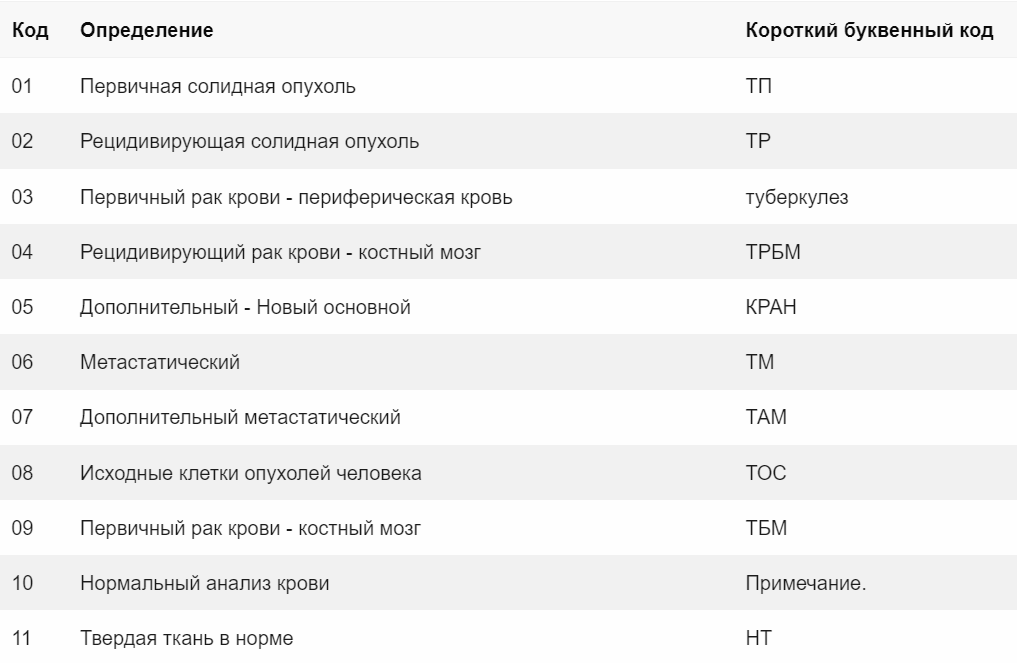

In [10]:
df_analysing['primary_diagnosis'].unique()

array(['Adenocarcinoma, NOS', 'Adenocarcinoma with mixed subtypes',
       'Papillary adenocarcinoma, NOS', 'Acinar cell carcinoma',
       'Mucinous adenocarcinoma', 'Clear cell adenocarcinoma, NOS',
       'Bronchiolo-alveolar carcinoma, non-mucinous',
       'Bronchio-alveolar carcinoma, mucinous', 'Solid carcinoma, NOS',
       'Micropapillary carcinoma, NOS',
       'Bronchiolo-alveolar adenocarcinoma, NOS',
       'Signet ring cell carcinoma'], dtype=object)

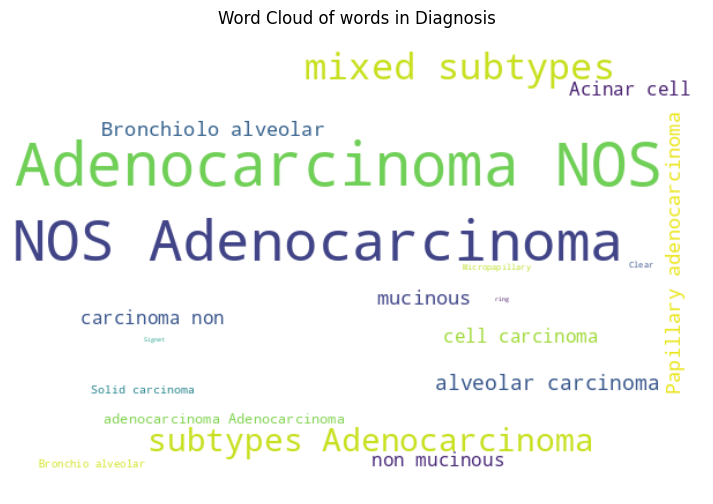

In [11]:
from wordcloud import WordCloud

reviews_text = ' '.join(df_analysing['primary_diagnosis'].dropna())
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(reviews_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of words in Diagnosis')
plt.axis('off')
plt.show()

In [12]:
diagnosis_dict = {'Adenocarcinoma, NOS' : 1,
                  'Adenocarcinoma with mixed subtypes': 2,
                  'Papillary adenocarcinoma, NOS' : 3,
                  'Acinar cell carcinoma' : 4,
                  'Mucinous adenocarcinoma' : 5,
                  'Clear cell adenocarcinoma, NOS' : 6,
                  'Bronchiolo-alveolar carcinoma, non-mucinous' : 7,
                  'Bronchio-alveolar carcinoma, mucinous' : 8,
                  'Solid carcinoma, NOS' : 9,
                  'Micropapillary carcinoma, NOS' : 10,
                  'Bronchiolo-alveolar adenocarcinoma, NOS' : 11,
                  'Signet ring cell carcinoma': 12
                }

In [13]:
df_analysing['diagnosis_encoded'] = df_analysing['primary_diagnosis'].replace(diagnosis_dict)

/tmp/ipykernel_19/982149609.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_analysing['diagnosis_encoded'] = df_analysing['primary_diagnosis'].replace(diagnosis_dict)


In [14]:
df_analysing['diagnosis_encoded'].value_counts()

diagnosis_encoded
1     376
2     114
3      25
4      22
7      22
5      20
9       6
8       5
6       3
10      3
11      3
12      1
Name: count, dtype: int64

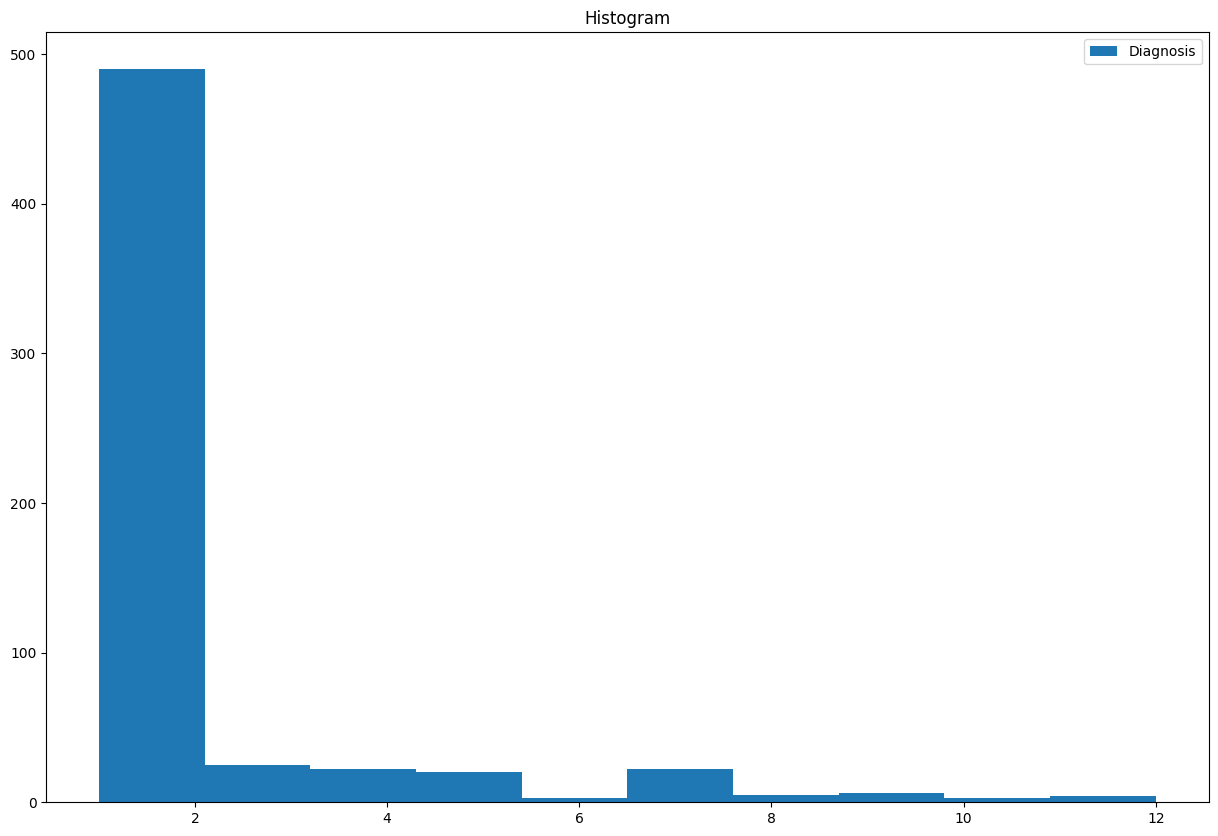

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.hist(df_analysing['diagnosis_encoded'])

# Title to the plot
plt.title("Histogram")

# Adding the legends
plt.legend(["Diagnosis"])
plt.show()

In [16]:
df_analysing.drop(['primary_diagnosis'],axis=1,inplace=True)

In [17]:
df_analysing['cigarettes_per_day'] = df_analysing['cigarettes_per_day'].fillna(0)

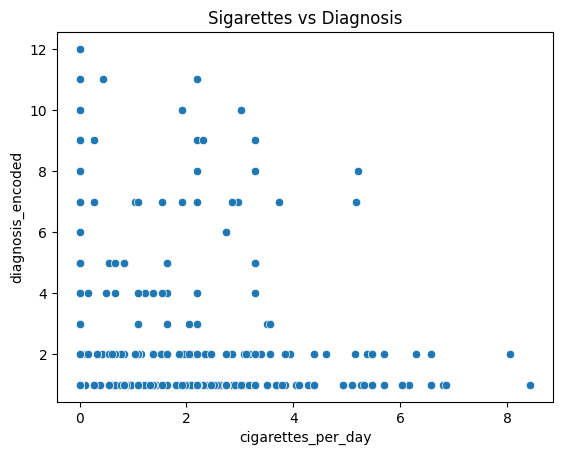

In [18]:
# Scatter plot for Sigarettes vs Diagnosis plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_analysing, x='cigarettes_per_day', y='diagnosis_encoded')
plt.title('Sigarettes vs Diagnosis')
plt.show()

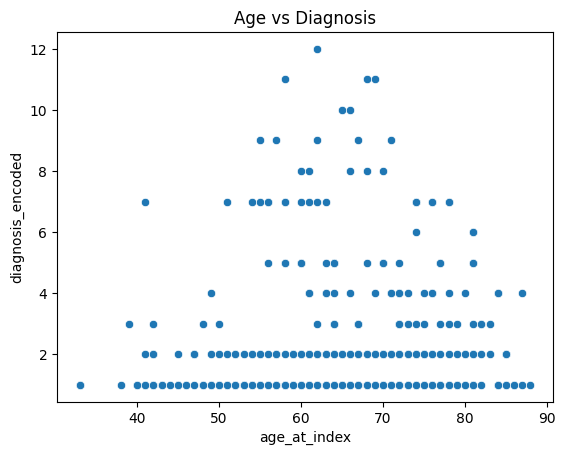

In [19]:
# Scatter plot for Sigarettes vs Diagnosis plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_analysing, x='age_at_index', y='diagnosis_encoded')
plt.title('Age vs Diagnosis')
plt.show()

In [20]:
df_analysing['tissue_or_organ_of_origin'].unique()

array(['Lower lobe, lung', 'Upper lobe, lung', 'Middle lobe, lung',
       'Lung, NOS', 'Main bronchus', 'Overlapping lesion of lung'],
      dtype=object)

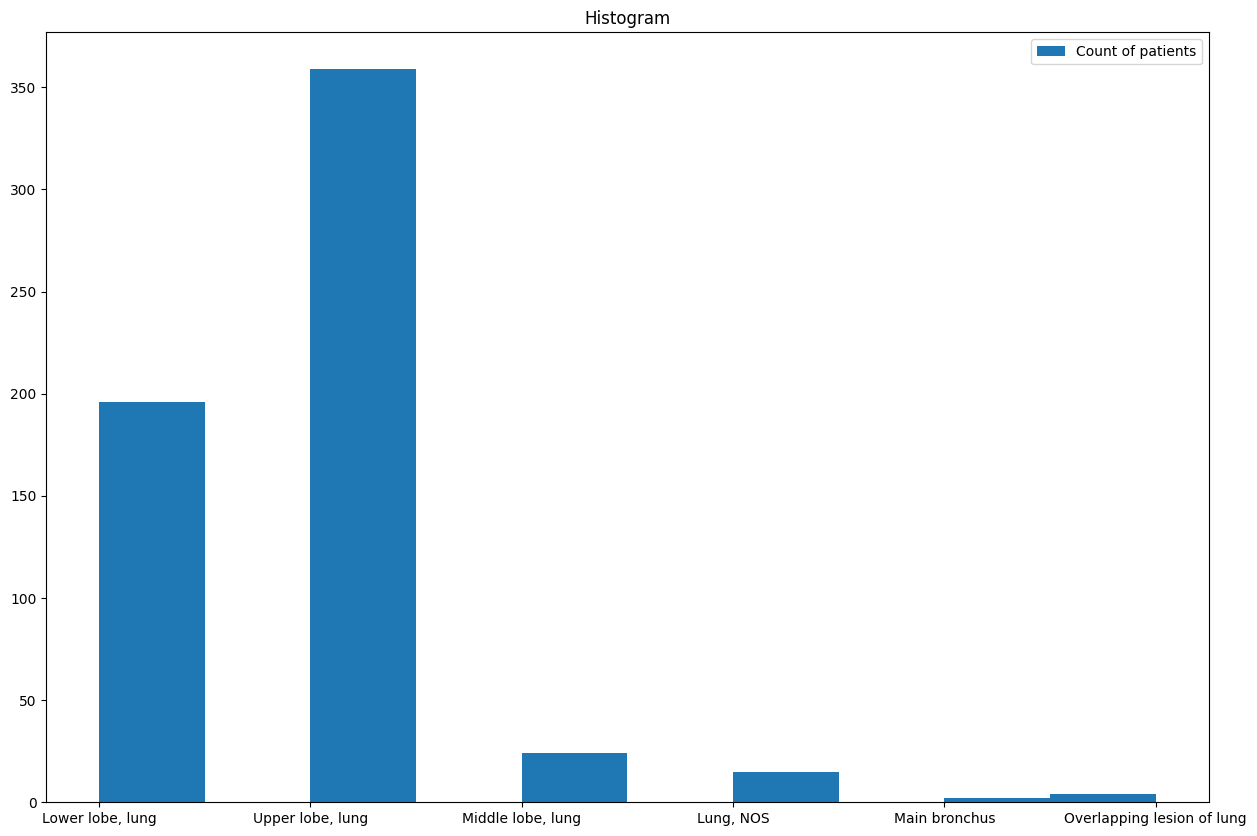

In [21]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.hist(df_analysing['tissue_or_organ_of_origin'])

# Title to the plot
plt.title("Histogram")

# Adding the legends
plt.legend(["Count of patients"])
plt.show()

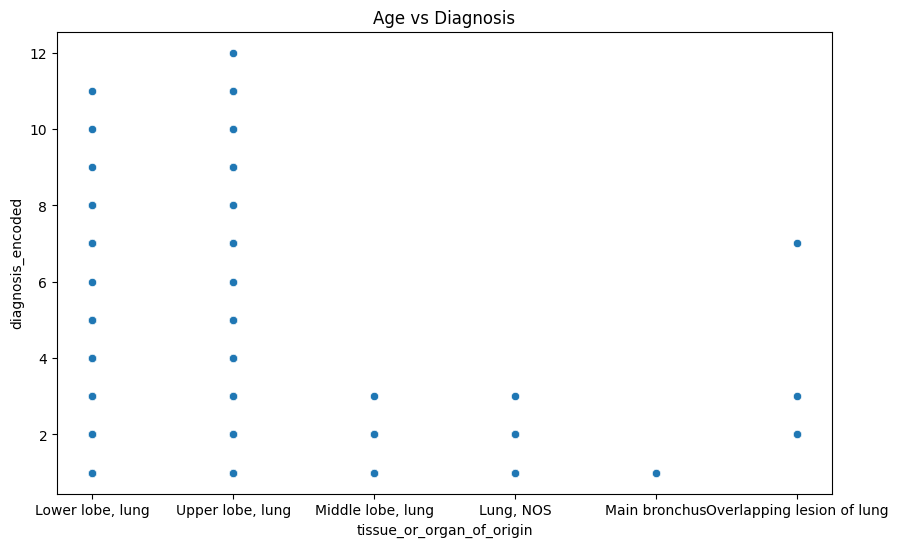

In [22]:
# Scatter plot for Sigarettes vs Diagnosis 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_analysing, x='tissue_or_organ_of_origin', y='diagnosis_encoded')
plt.title('Age vs Diagnosis')
plt.show()

In [23]:
heatmap_1_df = df_analysing.iloc[:,71:88]
heatmap_1_df.insert (loc= 0 , column='diagnosis_encoded', value=df_analysing['diagnosis_encoded'])

In [24]:
heatmap_1_df.head()

,diagnosis_encoded,ENSG00000007968.7,ENSG00000080839.12,ENSG00000096968.14,ENSG00000101412.13,ENSG00000103479.16,ENSG00000105173.14,ENSG00000105810.10,ENSG00000110092.4,ENSG00000111276.11,ENSG00000112242.15,ENSG00000115415.20,ENSG00000118971.9,ENSG00000123374.11,ENSG00000124762.14,ENSG00000126561.17,ENSG00000129173.13,ENSG00000133101.10
0,1,566,1573,872,1527,4925,485,417,35898,4214,1891,14765,969,1656,11282,2266,453,22
1,1,206,749,1182,466,9986,234,551,10680,5968,1673,25899,2508,1141,5729,3031,194,90
2,1,191,1826,1157,2420,5566,1661,2957,23224,3692,1573,41832,1196,2195,12377,2454,1087,97
3,2,560,1228,2522,2969,7981,502,2574,29990,4790,2787,37713,3842,2479,15722,4879,416,11
4,2,78,194,495,390,4859,64,1054,9610,2894,773,8284,721,463,5403,943,106,17


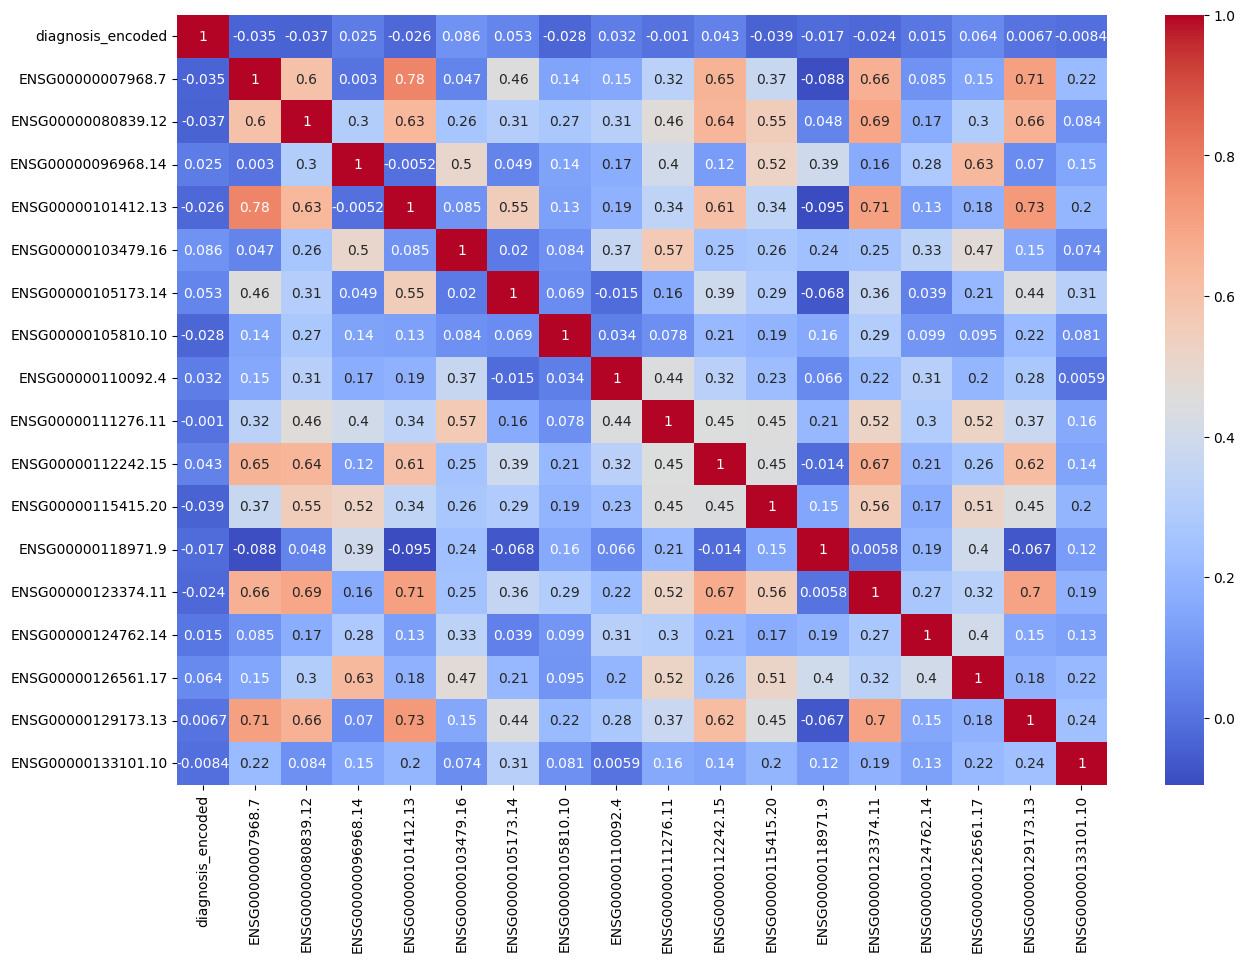

In [25]:
# Compute the correlation matrix between gene expression and diagnosis
corr_matrix = heatmap_1_df.corr()

fig, ax = plt.subplots(figsize=(15, 10))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()

In [26]:
heatmap_2_df = df_analysing.iloc[:,88:105]
heatmap_2_df.insert (loc= 0 , column='diagnosis_encoded', value=df_analysing['diagnosis_encoded'])

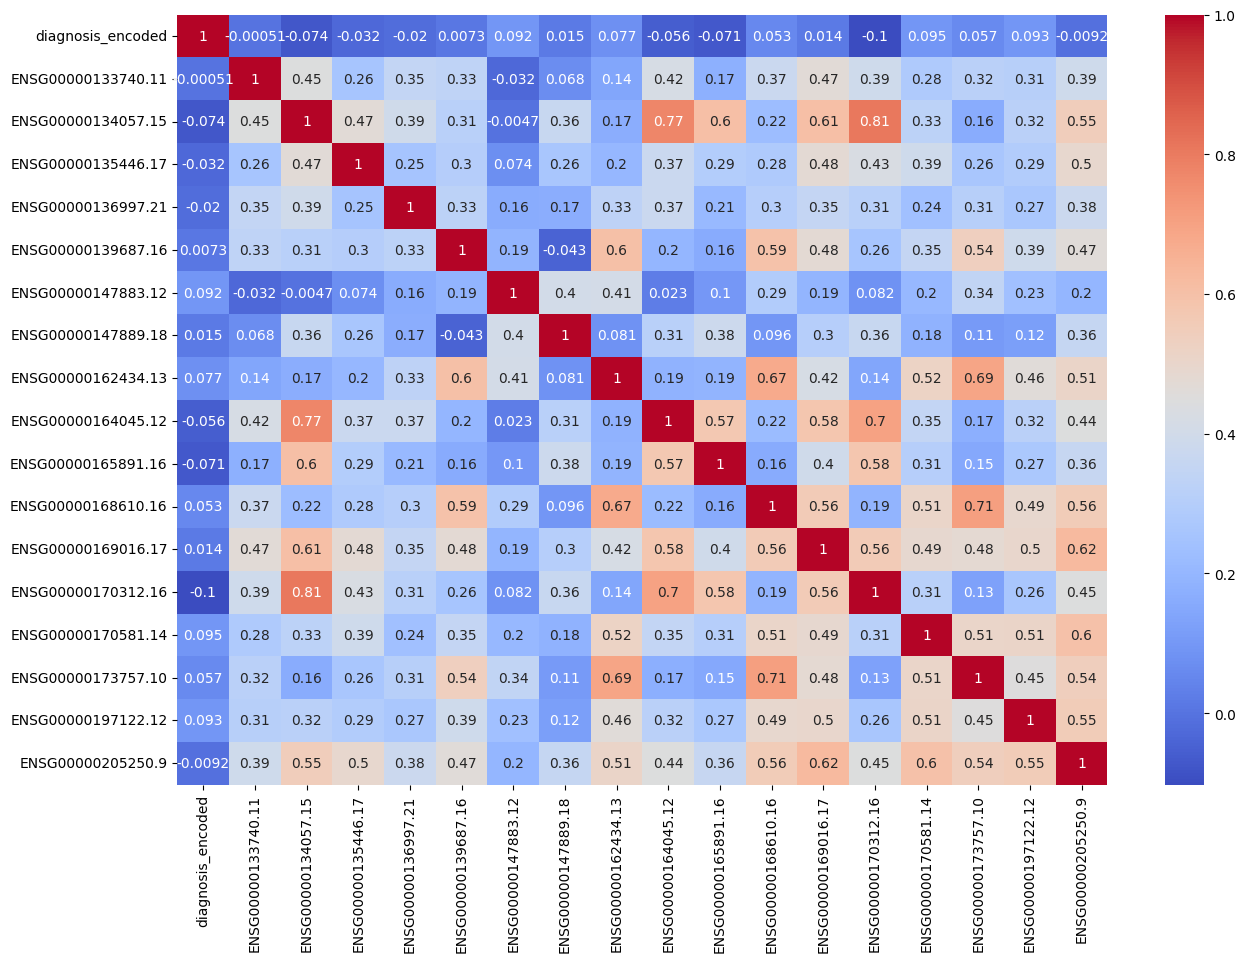

In [27]:
# Compute the correlation matrix between gene expression and diagnosis
corr_matrix = heatmap_2_df.corr()

fig, ax = plt.subplots(figsize=(15, 10))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()

# Modeling

# Multiclass classification

In [28]:
X=df.iloc[:,1:35]
y=df['primary_diagnosis']

In [29]:
X.head()

,ENSG00000007968.7,ENSG00000080839.12,ENSG00000096968.14,ENSG00000101412.13,ENSG00000103479.16,ENSG00000105173.14,ENSG00000105810.10,ENSG00000110092.4,ENSG00000111276.11,ENSG00000112242.15,...,ENSG00000162434.13,ENSG00000164045.12,ENSG00000165891.16,ENSG00000168610.16,ENSG00000169016.17,ENSG00000170312.16,ENSG00000170581.14,ENSG00000173757.10,ENSG00000197122.12,ENSG00000205250.9
0,103,355,940,221,2135,67,765,6327,2885,712,...,9325,66,27,11759,273,394,3149,2918,1832,2089
1,131,425,1033,563,2706,211,453,11707,2561,1718,...,5019,107,57,14069,573,1366,6050,2515,6685,2355
2,123,379,281,916,1247,812,152,1966,2064,814,...,2040,76,42,16958,555,786,2066,2356,9958,1835
3,160,531,775,399,1723,185,903,12465,2811,1328,...,9286,80,40,12227,404,753,3874,2302,3523,1980
4,203,507,1382,238,4188,155,1433,8374,5175,1302,...,11676,121,67,24638,673,578,6735,3369,3558,3001


In [30]:
y.head()

0                   Adenocarcinoma, NOS
1                   Adenocarcinoma, NOS
2                   Adenocarcinoma, NOS
3    Adenocarcinoma with mixed subtypes
4    Adenocarcinoma with mixed subtypes
Name: primary_diagnosis, dtype: object

In [31]:
# Stitching diagnoses for the model
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

In [32]:
diagnosis_pred_names = le.classes_
diagnosis_pred_names

array(['Acinar cell carcinoma', 'Adenocarcinoma with mixed subtypes',
       'Adenocarcinoma, NOS', 'Bronchio-alveolar carcinoma, mucinous',
       'Bronchiolo-alveolar adenocarcinoma, NOS',
       'Bronchiolo-alveolar carcinoma, non-mucinous',
       'Clear cell adenocarcinoma, NOS', 'Micropapillary carcinoma, NOS',
       'Mucinous adenocarcinoma', 'Papillary adenocarcinoma, NOS',
       'Signet ring cell carcinoma', 'Solid carcinoma, NOS'], dtype=object)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train

,ENSG00000007968.7,ENSG00000080839.12,ENSG00000096968.14,ENSG00000101412.13,ENSG00000103479.16,ENSG00000105173.14,ENSG00000105810.10,ENSG00000110092.4,ENSG00000111276.11,ENSG00000112242.15,...,ENSG00000162434.13,ENSG00000164045.12,ENSG00000165891.16,ENSG00000168610.16,ENSG00000169016.17,ENSG00000170312.16,ENSG00000170581.14,ENSG00000173757.10,ENSG00000197122.12,ENSG00000205250.9
145,371,550,957,764,4588,260,1473,21249,2648,1508,...,8722,190,78,12989,451,1038,5920,1599,4561,2345
9,719,1397,3180,1451,8516,427,2003,9314,3673,4959,...,15469,357,264,29025,1560,2314,57269,4345,9978,6692
375,541,1668,3922,1481,3957,449,4579,33401,6927,3896,...,15171,1288,1556,16235,793,5047,17384,4795,5079,4609
523,378,547,1201,891,5839,165,2323,15330,3335,1614,...,14331,123,108,22659,1138,642,11044,4854,5255,4669
188,611,2312,3014,2260,3520,1254,8861,50523,2709,2811,...,15775,876,1165,15676,794,4717,14832,4964,4509,7727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1357,1066,2467,1357,9841,492,1519,19854,5488,2347,...,16000,500,350,40273,839,2247,10919,5527,7330,6063
106,235,592,2024,693,2517,377,1299,9666,5664,1202,...,10453,194,83,12564,514,788,9436,4091,4960,3864
270,273,395,418,434,1185,161,682,6993,1652,550,...,3639,241,39,5044,334,1440,4576,1454,1811,1734
435,801,793,322,2553,1922,528,1788,28133,3745,1408,...,7418,272,284,12337,943,2425,8892,2020,5779,4796


In [35]:
y_train

array([ 2,  1,  1,  0,  2,  2,  2,  2, 10,  2,  2,  1,  2,  8,  1,  8,  2,
        2,  0,  2,  1,  2,  1,  2,  2,  2,  2,  2,  1,  2,  1,  9,  1,  1,
       11,  2,  1,  1,  2,  2,  0,  2,  1,  2,  2,  2,  2,  2,  1,  2,  2,
        2,  7,  2,  2,  2,  2,  9,  2,  2,  8,  8,  3,  2,  2,  2,  2,  9,
        2,  2,  2,  1,  2,  2,  2,  2,  9,  2,  9,  2,  2,  2,  5,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  2,  1,  1, 11,  1,  9,  2,
        2,  2,  9,  2,  2,  2,  2,  2,  1,  2,  0,  5,  1,  2,  2,  2,  2,
        2,  2,  2,  2,  8,  2,  2,  2, 11,  2,  1,  2,  1,  2,  2,  2,  2,
        2,  2,  1,  2,  2,  2,  2,  2,  1,  9,  2,  2,  1,  1,  1,  2,  1,
        2,  5,  2,  2,  1,  2,  2,  2,  1,  2,  2,  2,  1,  2,  2,  1,  1,
        5,  2,  2,  2,  1,  9,  2,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,
        1,  2,  2,  9,  2,  2,  2,  2,  8,  2,  2,  1,  2,  2,  9,  2,  2,
        1,  1,  0,  2,  7,  1,  8,  2,  2,  2,  2,  1,  2,  2,  2,  1,  5,
        3,  2,  2,  2,  0

In [36]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [37]:
# Create and train a logistic regression model
lr = LogisticRegression(C=100, random_state=3, solver='lbfgs', max_iter=10000)
lr.fit(X_train_std, y_train)

LogisticRegression(C=100, max_iter=10000, random_state=3)

In [38]:
# Create predictions
y_pred = lr.predict(X_test_std)

In [39]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 3))

Accuracy:  0.5


In [40]:
# Print the results of the model
print(classification_report(y_test, y_pred, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], target_names=diagnosis_pred_names, zero_division=0))

                                             precision    recall  f1-score   support

                      Acinar cell carcinoma       0.12      0.04      0.06        26
         Adenocarcinoma with mixed subtypes       0.64      0.79      0.71        73
                        Adenocarcinoma, NOS       0.00      0.00      0.00         0
      Bronchio-alveolar carcinoma, mucinous       0.00      0.00      0.00         1
    Bronchiolo-alveolar adenocarcinoma, NOS       0.00      0.00      0.00         4
Bronchiolo-alveolar carcinoma, non-mucinous       0.00      0.00      0.00         1
             Clear cell adenocarcinoma, NOS       0.00      0.00      0.00         0
              Micropapillary carcinoma, NOS       0.00      0.00      0.00         5
                    Mucinous adenocarcinoma       0.50      0.33      0.40         3
              Papillary adenocarcinoma, NOS       0.00      0.00      0.00         0
                 Signet ring cell carcinoma       0.00      0.00

In [41]:
# Convert from integer to float
X_train_fl = X_train.astype(float, 64)
X_test_fl = X_test.astype(float, 64)

# Apply the same scaling to both datasets
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train_fl)
X_test_scl = scaler.transform(X_test_fl)

In [42]:
# pca = PCA()
# pca.fit_transform(X_train)

In [43]:
# total = sum(pca.explained_variance_)
# k = 0
# current_variance = 0
# while current_variance/total < 0.90:
#     current_variance += pca.explained_variance_[k]
#     k = k + 1
    
# print(k, " features explain around 90% of the variance.", sep='')

# pca = PCA(n_components=k)
# X_train.pca = pca.fit(X_train)
# X_train_pca = pca.transform(X_train)
# X_test_pca = pca.transform(X_test)

# var_exp = pca.explained_variance_ratio_.cumsum()
# var_exp = var_exp*100
# plt.bar(range(k), var_exp);

In [44]:
# kmeans = KMeans(n_clusters=2, random_state=5, n_init=10).fit(X_train_std)
# km_pred = kmeans.predict(X_test_std)

# print('K-means accuracy:', round(accuracy_score(y_test, km_pred), 3))

# cm_km = confusion_matrix(y_test, km_pred)

# ax = plt.subplot()
# sns.heatmap(cm_km, annot=True, ax = ax, fmt='g', cmap='Greens') 

# # labels, title and ticks
# ax.set_xlabel('Predicted labels')
# ax.set_ylabel('True labels') 
# ax.set_title('K-means Confusion Matrix') 
# ax.xaxis.set_ticklabels(diagnosis_dict) 
# ax.yaxis.set_ticklabels(diagnosis_dict, rotation=360);

In [45]:
# # Create a Gaussian classifier
# nb_model = GaussianNB()

# nb_model.fit(X_train, y_train)

# nb_pred = nb_model.predict(X_test)

# print('Naive Bayes accuracy:', round(accuracy_score(y_test, nb_pred), 3))

# cm_nb =  confusion_matrix(y_test, nb_pred)

# ax = plt.subplot()
# sns.heatmap(cm_nb, annot=True, ax = ax, fmt='g', cmap='YlGnBu') 

# # labels, title and ticks
# ax.set_xlabel('Predicted labels')
# ax.set_ylabel('True labels') 
# ax.set_title('Naive Bayes Confusion Matrix') 
# ax.xaxis.set_ticklabels(diagnosis_pred_names) 
# ax.yaxis.set_ticklabels(diagnosis_pred_names, rotation=360);

In [46]:
# Can't be used because cv must be greater than 1, 
# but there is a class in the dataset where 1 is a dimension

# svm_param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10], 
                    # "kernel": ["linear", "rbf", "poly"], "decision_function_shape" : ["ovo", "ovr"]} 

# # Create SVM grid search classifier
# svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=2)

# # Train the classifier
# svm_grid.fit(X_train_pca, y_train)

# print("Best Parameters:\n", svm_grid.best_params_)

# # Select best svc
# best_svc = svm_grid.best_estimator_

# # Make predictions using the optimised parameters
# svm_pred = best_svc.predict(X_test_pca)

# print('SVM accuracy:', round(accuracy_score(y_test, svm_pred), 3))

# cm_svm =  confusion_matrix(y_test, svm_pred)

# ax = plt.subplot()
# sns.heatmap(cm_svm, annot=True, ax = ax, fmt='g', cmap='BuPu') 

In [47]:
# Can't be used because cv must be greater than 1, 
# but there is a class in the dataset where 1 is a dimension

# # Hyperparameters search grid 
# rf_param_grid = {'bootstrap': [False, True],
#          'n_estimators': [60, 70, 80, 90, 100],
#          'max_features': [0.6, 0.65, 0.7, 0.75, 0.8],
#          'min_samples_leaf': [8, 10, 12, 14],
#          'min_samples_split': [3, 5, 7]
#         }

# # Instantiate random forest classifier
# rf_estimator = RandomForestClassifier(random_state=0)

# # Create the GridSearchCV object
# rf_model = GridSearchCV(estimator=rf_estimator, param_grid=rf_param_grid, cv=3, scoring='accuracy')

# # Fine-tune the hyperparameters
# rf_model.fit(X_train, y_train)

# print("Best Parameters:\n", rf_model.best_params_)

# # Get the best model
# rf_model_best = rf_model.best_estimator_

# # Make predictions using the optimised parameters
# rf_pred = rf_model_best.predict(X_test)

# print('Random Forest accuracy:', round(accuracy_score(y_test, rf_pred), 3))

# cm_rf = confusion_matrix(y_test, rf_pred)

# ax = plt.subplot()
# sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 

# # labels, title and ticks
# ax.set_xlabel('Predicted labels')
# ax.set_ylabel('True labels') 
# ax.set_title('Random Forest Confusion Matrix') 
# ax.xaxis.set_ticklabels(diagnosis_pred_names) 
# ax.yaxis.set_ticklabels(diagnosis_pred_names, rotation=360);

In [48]:
# Can't be used because cv must be greater than 1, 
# but there is a class in the dataset where 1 is a dimension

# xgb_grid_params = {'max_depth': [3, 4, 5, 6, 7, 8, 10, 12],
#                'min_child_weight': [1, 2, 4, 6, 8, 10, 12, 15],
#                'n_estimators': [40, 50, 60, 70, 80, 90, 100, 110, 120, 130],
#                'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3]}

# fixed_params = {'random_state': 0,
#                 'n_jobs': -1}

# xgb_model = GridSearchCV(xgb.XGBClassifier(**fixed_params), 
#                        param_grid = xgb_grid_params, 
#                        scoring = 'accuracy',
#                        cv = 3)

# xgb_model.fit(X_train_pca, y_train)

# print("Best Parameters:\n", xgb_model.best_params_)

# # Get the best model
# xgb_model_best = xgb_model.best_estimator_

# # Make predictions using the optimised parameters
# xgb_pred = xgb_model_best.predict(X_test_pca)

# print('XGB (PCA with Grid Search) accuracy:', round(accuracy_score(y_test, xgb_pred), 3))

# cm_xgb = confusion_matrix(y_test, xgb_pred)

# ax = plt.subplot()
# sns.heatmap(cm_xgb, annot=True, ax = ax, fmt='g', cmap='Greens') 

# # labels, title and ticks
# ax.set_xlabel('Predicted labels')
# ax.set_ylabel('True labels') 
# ax.set_title('XGB (PCA with Grid Search) Confusion Matrix') 
# ax.xaxis.set_ticklabels(diagnosis_pred_names) 
# ax.yaxis.set_ticklabels(diagnosis_pred_names, rotation=360);

In [49]:
# xgb2_model = xgb.XGBClassifier()
# xgb2_model.fit(X_train_pca, y_train)

# xgb2_pred = xgb2_model.predict(X_test_pca)

# print('Accuracy: ', round(accuracy_score(y_test, xgb2_pred), 3))

# cm_xgb2 = confusion_matrix(y_test, xgb2_pred)

# ax = plt.subplot()
# sns.heatmap(cm_xgb2, annot=True, ax = ax, fmt='g', cmap='Oranges') 

# # Labels, title and ticks
# ax.set_xlabel('Predicted labels')
# ax.set_ylabel('True labels') 
# ax.set_title('XGB (PCA without Grid Search) Confusion Matrix') 
# ax.xaxis.set_ticklabels(diagnosis_pred_names) 
# ax.yaxis.set_ticklabels(diagnosis_pred_names, rotation=360);

In [50]:
# print(classification_report(y_test, xgb2_pred, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
#                             target_names=diagnosis_pred_names, zero_division=0))

In [51]:
# xgb3_model = xgb.XGBClassifier()
# xgb3_model.fit(X_train, y_train)

# xgb3_pred = xgb3_model.predict(X_test)

# print('XGB (no PCA or Grid Search) accuracy:', round(accuracy_score(y_test, xgb3_pred), 3))

# cm_xgb3 = confusion_matrix(y_test, xgb3_pred)

# ax = plt.subplot()
# sns.heatmap(cm_xgb3, annot=True, ax = ax, fmt='g', cmap='Purples') 

# # Labels, title and ticks
# ax.set_xlabel('Predicted labels')
# ax.set_ylabel('True labels') 
# ax.set_title('XGB (no PCA or Grid Search) Confusion Matrix') 
# ax.xaxis.set_ticklabels(diagnosis_pred_names) 
# ax.yaxis.set_ticklabels(diagnosis_pred_names, rotation=360);

# Binary classification

In [52]:
binary_diagnosis_dict = {'Adenocarcinoma, NOS' : 'Adenocarcinoma, NOS',
                  'Adenocarcinoma with mixed subtypes': 'Not adenocarcinoma, NOS',
                  'Papillary adenocarcinoma, NOS' : 'Not adenocarcinoma, NOS',
                  'Acinar cell carcinoma' : 'Not adenocarcinoma, NOS',
                  'Mucinous adenocarcinoma' : 'Not adenocarcinoma, NOS',
                  'Clear cell adenocarcinoma, NOS' : 'Not adenocarcinoma, NOS',
                  'Bronchiolo-alveolar carcinoma, non-mucinous' : 'Not adenocarcinoma, NOS',
                  'Bronchio-alveolar carcinoma, mucinous' : 'Not adenocarcinoma, NOS',
                  'Solid carcinoma, NOS' : 'Not adenocarcinoma, NOS',
                  'Micropapillary carcinoma, NOS' : 'Not adenocarcinoma, NOS',
                  'Bronchiolo-alveolar adenocarcinoma, NOS' : 'Not adenocarcinoma, NOS',
                  'Signet ring cell carcinoma': 'Not adenocarcinoma, NOS'
                }

In [53]:
df['binary_diagnosis_encoded'] = df['primary_diagnosis'].replace(binary_diagnosis_dict)

In [54]:
df.drop(['primary_diagnosis'],axis=1,inplace=True)

In [55]:
df['binary_diagnosis_encoded'].value_counts()

binary_diagnosis_encoded
Adenocarcinoma, NOS        376
Not adenocarcinoma, NOS    224
Name: count, dtype: int64

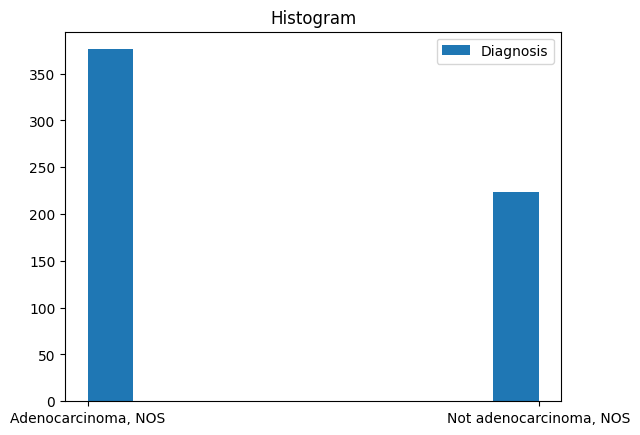

In [56]:
ax = plt.subplots()
plt.hist(df['binary_diagnosis_encoded'])

# Title to the plot
plt.title("Histogram")

# Adding the legends
plt.legend(["Diagnosis"])
plt.show()

In [57]:
X=df.iloc[:,1:35]
y=df['binary_diagnosis_encoded']

In [58]:
X.head()

,ENSG00000007968.7,ENSG00000080839.12,ENSG00000096968.14,ENSG00000101412.13,ENSG00000103479.16,ENSG00000105173.14,ENSG00000105810.10,ENSG00000110092.4,ENSG00000111276.11,ENSG00000112242.15,...,ENSG00000162434.13,ENSG00000164045.12,ENSG00000165891.16,ENSG00000168610.16,ENSG00000169016.17,ENSG00000170312.16,ENSG00000170581.14,ENSG00000173757.10,ENSG00000197122.12,ENSG00000205250.9
0,103,355,940,221,2135,67,765,6327,2885,712,...,9325,66,27,11759,273,394,3149,2918,1832,2089
1,131,425,1033,563,2706,211,453,11707,2561,1718,...,5019,107,57,14069,573,1366,6050,2515,6685,2355
2,123,379,281,916,1247,812,152,1966,2064,814,...,2040,76,42,16958,555,786,2066,2356,9958,1835
3,160,531,775,399,1723,185,903,12465,2811,1328,...,9286,80,40,12227,404,753,3874,2302,3523,1980
4,203,507,1382,238,4188,155,1433,8374,5175,1302,...,11676,121,67,24638,673,578,6735,3369,3558,3001


In [59]:
y.head()

0        Adenocarcinoma, NOS
1        Adenocarcinoma, NOS
2        Adenocarcinoma, NOS
3    Not adenocarcinoma, NOS
4    Not adenocarcinoma, NOS
Name: binary_diagnosis_encoded, dtype: object

In [60]:
# Stitching diagnoses for the model
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

In [61]:
diagnosis_pred_names = le.classes_
diagnosis_pred_names

array(['Adenocarcinoma, NOS', 'Not adenocarcinoma, NOS'], dtype=object)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Artificially generate data using the SMOTE method

from sklearn.utils import resample
from collections import Counter

print("Before Upsampling:-")
print(Counter(y_train))


# Let's use SMOTE to oversample
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_ov, y_train_ov = oversample.fit_resample(X_train, y_train)

print("After Upsampling:-")
print(Counter(y_train_ov))

Before Upsampling:-
Counter({0: 303, 1: 177})
After Upsampling:-
Counter({0: 303, 1: 303})


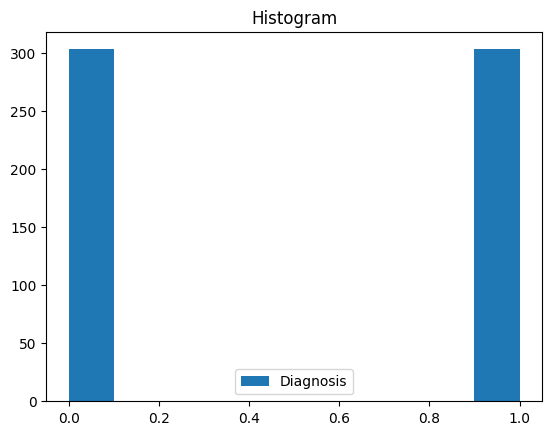

In [64]:
# Checking the balance of the data

ax = plt.subplots()
plt.hist(y_train_ov)

# Title to the plot
plt.title("Histogram")

# Adding the legends
plt.legend(["Diagnosis"])
plt.show()

**Logistic Regression**

Accuracy:  0.517
                         precision    recall  f1-score   support

    Adenocarcinoma, NOS       0.41      0.53      0.46        47
Not adenocarcinoma, NOS       0.00      0.00      0.00         0

              micro avg       0.41      0.53      0.46        47
              macro avg       0.20      0.27      0.23        47
           weighted avg       0.41      0.53      0.46        47



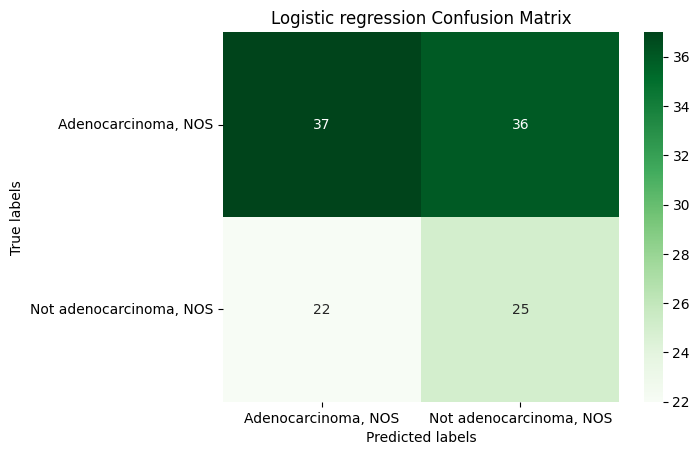

In [65]:
sc = StandardScaler()
sc.fit(X_train_ov)
X_train_std = sc.transform(X_train_ov)
X_test_std = sc.transform(X_test)

# Create and train a logistic regression model
lr = LogisticRegression(C=1, random_state=3, solver='liblinear', max_iter=10000)
lr.fit(X_train_std, y_train_ov)

y_pred = lr.predict(X_test_std)

print('Accuracy: ', round(accuracy_score(y_test, y_pred), 3))

print(classification_report(y_test, y_pred, labels = [1, 2],
                            target_names=diagnosis_pred_names, zero_division=0))

cm_lr = confusion_matrix(y_test, y_pred)

ax = plt.subplot()
sns.heatmap(cm_lr, annot=True, ax = ax, fmt='g', cmap='Greens') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Logistic regression Confusion Matrix') 
ax.xaxis.set_ticklabels(diagnosis_pred_names) 
ax.yaxis.set_ticklabels(diagnosis_pred_names, rotation=360);

**K-means**

K-means accuracy: 0.325
                         precision    recall  f1-score   support

    Adenocarcinoma, NOS       0.29      0.51      0.37        47
Not adenocarcinoma, NOS       0.00      0.00      0.00         0

              micro avg       0.29      0.51      0.37        47
              macro avg       0.15      0.26      0.19        47
           weighted avg       0.29      0.51      0.37        47



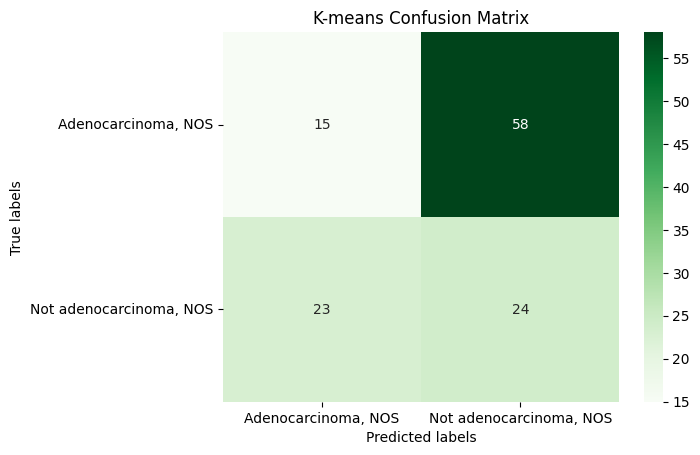

In [66]:
kmeans = KMeans(n_clusters=2, random_state=5, n_init=10).fit(X_train_std)
km_pred = kmeans.predict(X_test_std)

print('K-means accuracy:', round(accuracy_score(y_test, km_pred), 3))

print(classification_report(y_test, km_pred, labels = [1, 2],
                            target_names=diagnosis_pred_names, zero_division=0))

cm_km = confusion_matrix(y_test, km_pred)

ax = plt.subplot()
sns.heatmap(cm_km, annot=True, ax = ax, fmt='g', cmap='Greens') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('K-means Confusion Matrix') 
ax.xaxis.set_ticklabels(diagnosis_pred_names) 
ax.yaxis.set_ticklabels(diagnosis_pred_names, rotation=360);

**Naive Bayes**

Naive Bayes accuracy: 0.65
                         precision    recall  f1-score   support

    Adenocarcinoma, NOS       0.56      0.51      0.53        47
Not adenocarcinoma, NOS       0.00      0.00      0.00         0

              micro avg       0.56      0.51      0.53        47
              macro avg       0.28      0.26      0.27        47
           weighted avg       0.56      0.51      0.53        47



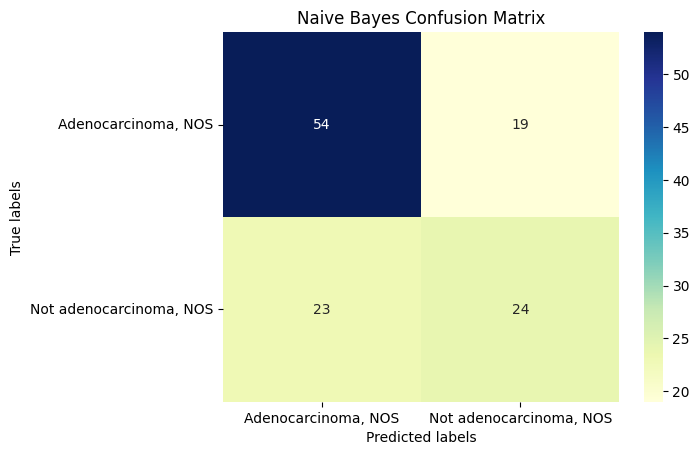

In [67]:
# Create a Gaussian classifier
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)

print('Naive Bayes accuracy:', round(accuracy_score(y_test, nb_pred), 3))

print(classification_report(y_test, nb_pred, labels = [1, 2],
                            target_names=diagnosis_pred_names, zero_division=0))

cm_nb =  confusion_matrix(y_test, nb_pred)

ax = plt.subplot()
sns.heatmap(cm_nb, annot=True, ax = ax, fmt='g', cmap='YlGnBu') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Naive Bayes Confusion Matrix') 
ax.xaxis.set_ticklabels(diagnosis_pred_names) 
ax.yaxis.set_ticklabels(diagnosis_pred_names, rotation=360);

**SVM**

Best Parameters:
 {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 0.01, 'kernel': 'poly'}
SVM accuracy: 0.633
                         precision    recall  f1-score   support

    Adenocarcinoma, NOS       1.00      0.06      0.12        47
Not adenocarcinoma, NOS       0.00      0.00      0.00         0

              micro avg       1.00      0.06      0.12        47
              macro avg       0.50      0.03      0.06        47
           weighted avg       1.00      0.06      0.12        47



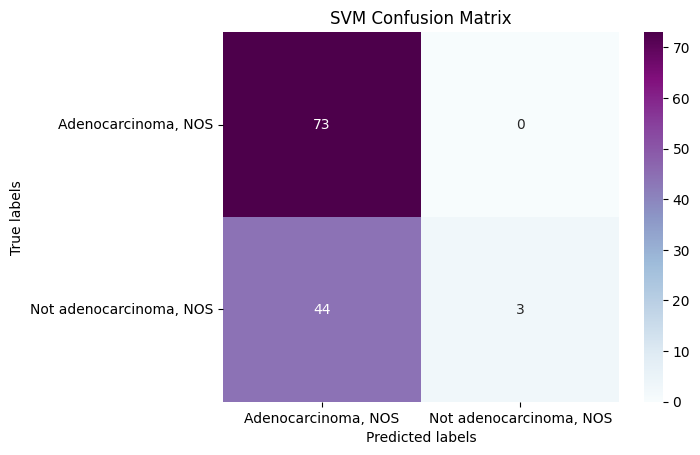

In [68]:
svm_param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10], 
                     "kernel": ["linear", "rbf", "poly"], "decision_function_shape" : ["ovo", "ovr"]} 
#svm_param_grid = {'C':[0.1] , 'decision_function_shape': ['ovo'], 'gamma': [1], 'kernel': ['linear']}
# Create SVM grid search classifier
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=3)

# Train the classifier
svm_grid.fit(X_train_scl, y_train)

print("Best Parameters:\n", svm_grid.best_params_)

# Select best svc
best_svc = svm_grid.best_estimator_

# Make predictions using the optimised parameters
svm_pred = best_svc.predict(X_test_scl)

print('SVM accuracy:', round(accuracy_score(y_test, svm_pred), 3))

print(classification_report(y_test, svm_pred, labels = [1, 2],
                            target_names=diagnosis_pred_names, zero_division=0))

cm_svm =  confusion_matrix(y_test, svm_pred)

ax = plt.subplot()
sns.heatmap(cm_svm, annot=True, ax = ax, fmt='g', cmap='BuPu') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('SVM Confusion Matrix') 
ax.xaxis.set_ticklabels(diagnosis_pred_names) 
ax.yaxis.set_ticklabels(diagnosis_pred_names, rotation=360);

**Random Forest**

Best Parameters:
 {'bootstrap': True, 'max_features': 0.7, 'min_samples_leaf': 12, 'min_samples_split': 3, 'n_estimators': 100}
Random Forest accuracy: 0.658
                         precision    recall  f1-score   support

    Adenocarcinoma, NOS       0.80      0.17      0.28        47
Not adenocarcinoma, NOS       0.00      0.00      0.00         0

              micro avg       0.80      0.17      0.28        47
              macro avg       0.40      0.09      0.14        47
           weighted avg       0.80      0.17      0.28        47



[Text(0, 0.5, 'Adenocarcinoma, NOS'), Text(0, 1.5, 'Not adenocarcinoma, NOS')]

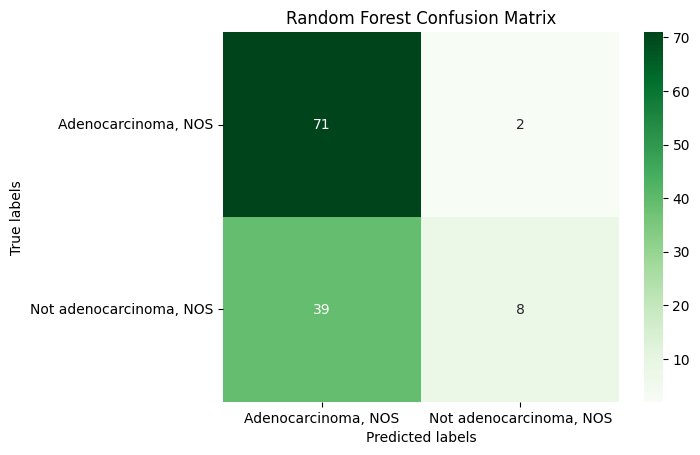

In [69]:
# Hyperparameters search grid 
rf_param_grid = {'bootstrap': [False, True],
         'n_estimators': [60, 70, 80, 90, 100],
         'max_features': [0.6, 0.65, 0.7, 0.75, 0.8],
         'min_samples_leaf': [8, 10, 12, 14],
         'min_samples_split': [3, 5, 7]
        }

# Instantiate random forest classifier
rf_estimator = RandomForestClassifier(random_state=0)

# Create the GridSearchCV object
rf_model = GridSearchCV(estimator=rf_estimator, param_grid=rf_param_grid, cv=3, scoring='accuracy')

# Fine-tune the hyperparameters
rf_model.fit(X_train_scl, y_train)

print("Best Parameters:\n", rf_model.best_params_)

# Get the best model
rf_model_best = rf_model.best_estimator_

# Make predictions using the optimised parameters
rf_pred = rf_model_best.predict(X_test_scl)

print('Random Forest accuracy:', round(accuracy_score(y_test, rf_pred), 3))

print(classification_report(y_test, rf_pred, labels = [1, 2],
                            target_names=diagnosis_pred_names, zero_division=0))

cm_rf = confusion_matrix(y_test, rf_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Random Forest Confusion Matrix') 
ax.xaxis.set_ticklabels(diagnosis_pred_names) 
ax.yaxis.set_ticklabels(diagnosis_pred_names, rotation=360)

**XGB (PCA with Grid Search)**

Best Parameters:
 {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 90}
XGB (PCA with Grid Search) accuracy: 0.625
                         precision    recall  f1-score   support

    Adenocarcinoma, NOS       0.75      0.06      0.12        47
Not adenocarcinoma, NOS       0.00      0.00      0.00         0

              micro avg       0.75      0.06      0.12        47
              macro avg       0.38      0.03      0.06        47
           weighted avg       0.75      0.06      0.12        47



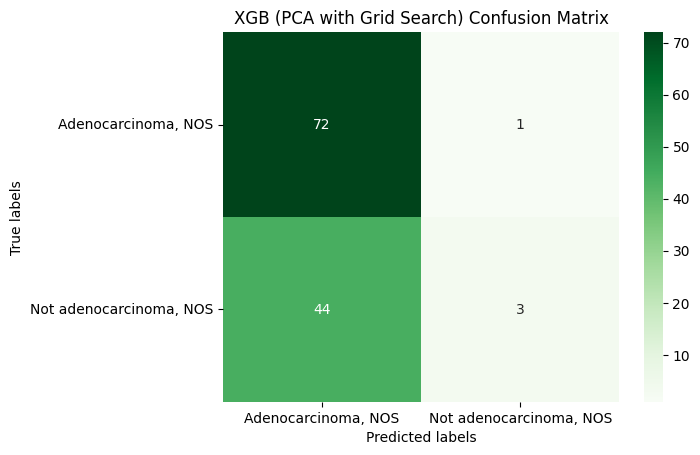

In [70]:
xgb_grid_params = {'max_depth': [3, 4, 5, 6, 7, 8, 10, 12],
               'min_child_weight': [1, 2, 4, 6, 8, 10, 12, 15],
               'n_estimators': [40, 50, 60, 70, 80, 90, 100, 110, 120, 130],
               'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3]}

fixed_params = {'random_state': 0,
                'n_jobs': -1}

xgb_model = GridSearchCV(xgb.XGBClassifier(**fixed_params), 
                       param_grid = xgb_grid_params, 
                       scoring = 'accuracy',
                       cv = 3)

xgb_model.fit(X_train_scl, y_train)

print("Best Parameters:\n", xgb_model.best_params_)

# Get the best model
xgb_model_best = xgb_model.best_estimator_

# Make predictions using the optimised parameters
xgb_pred = xgb_model_best.predict(X_test_scl)

print('XGB (PCA with Grid Search) accuracy:', round(accuracy_score(y_test, xgb_pred), 3))

print(classification_report(y_test, xgb_pred, labels = [1, 2],
                            target_names=diagnosis_pred_names, zero_division=0))

cm_xgb = confusion_matrix(y_test, xgb_pred)

ax = plt.subplot()
sns.heatmap(cm_xgb, annot=True, ax = ax, fmt='g', cmap='Greens') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('XGB (PCA with Grid Search) Confusion Matrix') 
ax.xaxis.set_ticklabels(diagnosis_pred_names) 
ax.yaxis.set_ticklabels(diagnosis_pred_names, rotation=360);

**XGB (PCA without Grid Search)**

Accuracy:  0.542
                         precision    recall  f1-score   support

    Adenocarcinoma, NOS       0.39      0.30      0.34        47
Not adenocarcinoma, NOS       0.00      0.00      0.00         0

              micro avg       0.39      0.30      0.34        47
              macro avg       0.19      0.15      0.17        47
           weighted avg       0.39      0.30      0.34        47



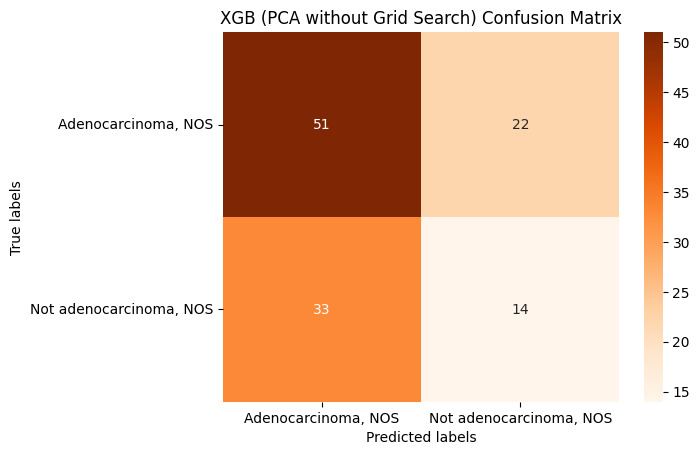

In [71]:
xgb2_model = xgb.XGBClassifier()
xgb2_model.fit(X_train_scl, y_train)

xgb2_pred = xgb2_model.predict(X_test_scl)

print('Accuracy: ', round(accuracy_score(y_test, xgb2_pred), 3))

print(classification_report(y_test, xgb2_pred, labels = [1, 2],
                            target_names=diagnosis_pred_names, zero_division=0))

cm_xgb2 = confusion_matrix(y_test, xgb2_pred)

ax = plt.subplot()
sns.heatmap(cm_xgb2, annot=True, ax = ax, fmt='g', cmap='Oranges') 

# Labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('XGB (PCA without Grid Search) Confusion Matrix') 
ax.xaxis.set_ticklabels(diagnosis_pred_names) 
ax.yaxis.set_ticklabels(diagnosis_pred_names, rotation=360);

**XGB (no PCA or Grid Search)**

XGB (no PCA or Grid Search) accuracy: 0.542
                         precision    recall  f1-score   support

    Adenocarcinoma, NOS       0.39      0.30      0.34        47
Not adenocarcinoma, NOS       0.00      0.00      0.00         0

              micro avg       0.39      0.30      0.34        47
              macro avg       0.19      0.15      0.17        47
           weighted avg       0.39      0.30      0.34        47



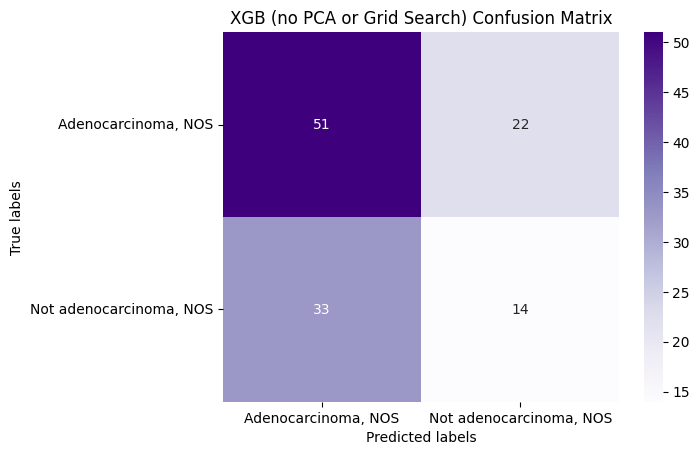

In [72]:
xgb3_model = xgb.XGBClassifier()
xgb3_model.fit(X_train_scl, y_train)

xgb3_pred = xgb3_model.predict(X_test_scl)

print('XGB (no PCA or Grid Search) accuracy:', round(accuracy_score(y_test, xgb3_pred), 3))

print(classification_report(y_test, xgb3_pred, labels = [1, 2],
                            target_names=diagnosis_pred_names, zero_division=0))

cm_xgb3 = confusion_matrix(y_test, xgb3_pred)

ax = plt.subplot()
sns.heatmap(cm_xgb3, annot=True, ax = ax, fmt='g', cmap='Purples') 

# Labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('XGB (no PCA or Grid Search) Confusion Matrix') 
ax.xaxis.set_ticklabels(diagnosis_pred_names) 
ax.yaxis.set_ticklabels(diagnosis_pred_names, rotation=360);

# Neural Network

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='softmax'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='softmax'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='softmax'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.count_params()

51969

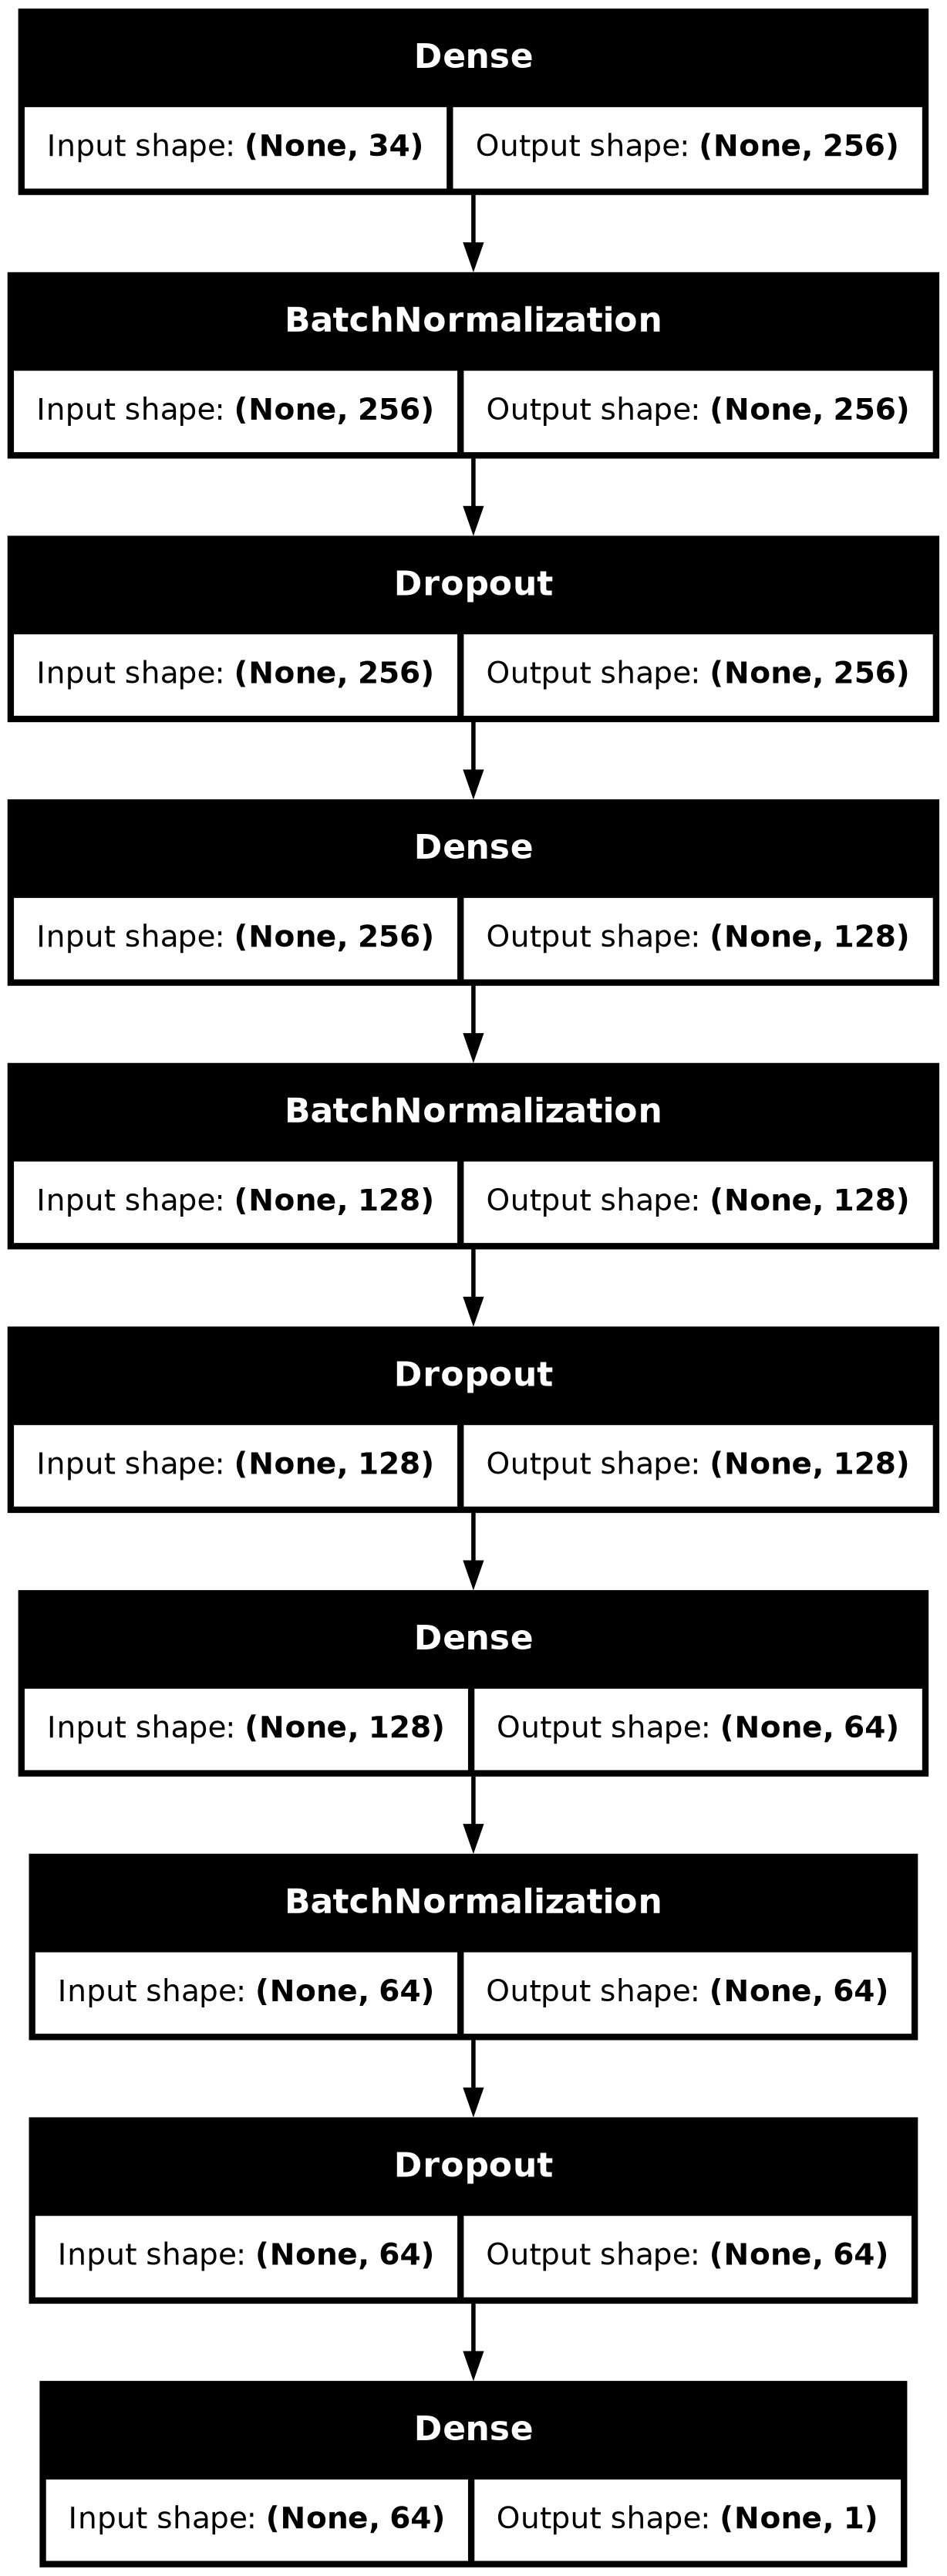

In [76]:
plot_model(model, show_shapes=1, show_layer_names=0)

In [77]:
# Compilation
model.compile(optimizer=Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

rlrp = ReduceLROnPlateau(monitor='loss', factor=0.1, verbose=0, patience=2, min_lr=0.0000001)
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_test, y_test), callbacks=[rlrp])

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.4769 - loss: 6.9298 - val_accuracy: 0.3917 - val_loss: 9.6983 - learning_rate: 0.1000
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3792 - loss: 9.6796 - val_accuracy: 0.3917 - val_loss: 9.6983 - learning_rate: 0.1000
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3830 - loss: 9.7002 - val_accuracy: 0.3917 - val_loss: 9.6983 - learning_rate: 0.1000
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3937 - loss: 9.5329 - val_accuracy: 0.3917 - val_loss: 9.6983 - learning_rate: 0.0100
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3841 - loss: 9.7194 - val_accuracy: 0.3917 - val_loss: 9.6983 - learning_rate: 0.0100
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3834 - loss: 9.7908 - val_accuracy: 0.3917 - val_loss: 9.6983 - learning_rate: 1.0000e-03
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3763 - loss: 9.8708 - val_accura

In [78]:
model.save('Gene_expression_model.h5')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4004 - loss: 9.5588 
Accuracy of our model on test data :  39.16666805744171 %


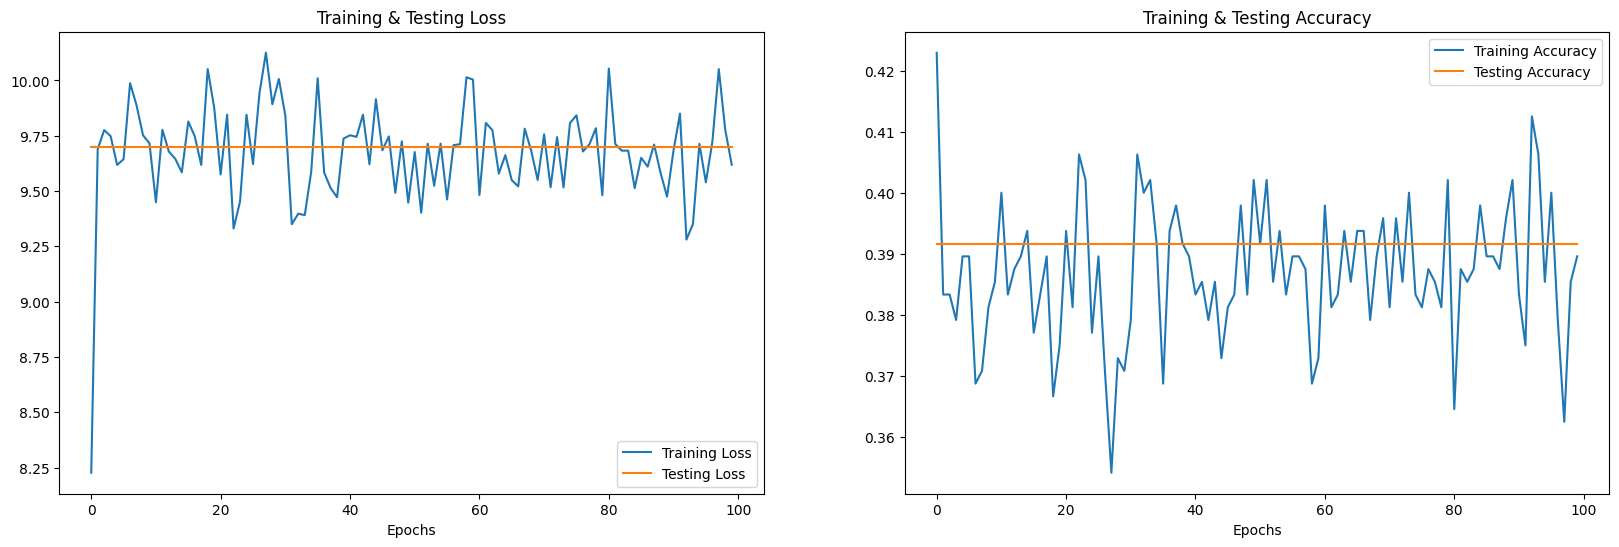

In [79]:
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [80]:
model.count_params()

51969

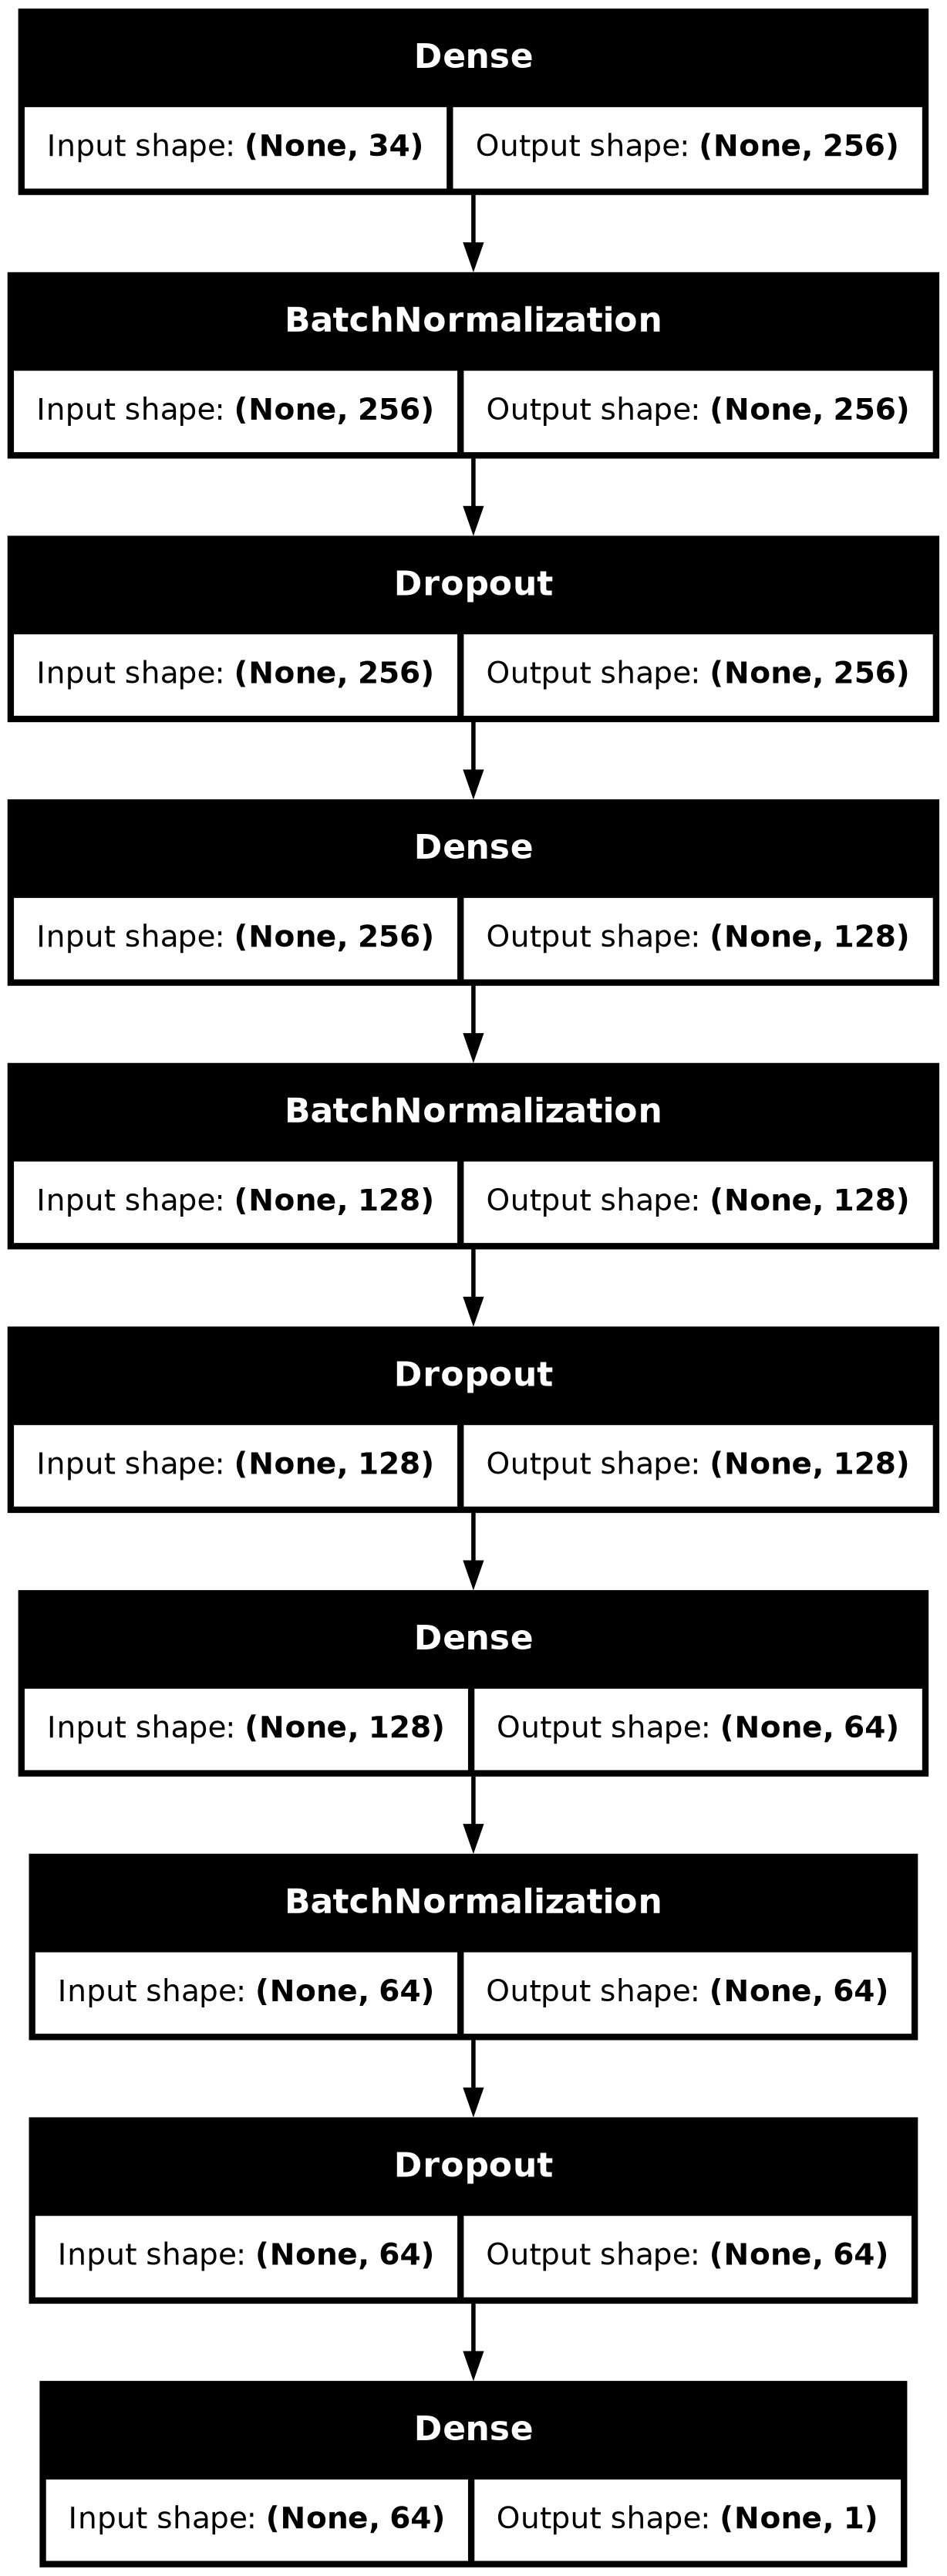

In [81]:
plot_model(model, show_shapes=1, show_layer_names=0)